In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib
import sklearn.model_selection
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from datetime import datetime

from sklearn.metrics import confusion_matrix, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV, train_test_split,cross_val_score

In [2]:
# Import Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import lightgbm as ltb
from tpot import TPOTClassifier

C:\Users\user\anaconda3\envs\MLComp\lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [3]:
#loading data set
test=pd.read_csv("./test.csv")
train=pd.read_csv("./train.csv")
train_m,train_n=train.shape
print(train_m,train_n)
test_m,test_n = test.shape
print(test_m,test_n)
print(test.head(10))
train.columns

18834 11
8072 9
       pet_id           issue_date         listing_date  condition  \
0  ANSL_75005  2005-08-17 00:00:00  2017-09-07 15:35:00        0.0   
1  ANSL_76663  2018-11-15 00:00:00  2019-05-08 17:24:00        1.0   
2  ANSL_58259  2012-10-11 00:00:00  2018-04-02 16:51:00        1.0   
3  ANSL_67171  2015-02-13 00:00:00  2018-04-06 07:25:00        1.0   
4  ANSL_72871  2017-01-18 00:00:00  2018-04-26 13:42:00        1.0   
5  ANSL_64886  2016-07-04 00:00:00  2017-07-28 19:22:00        0.0   
6  ANSL_73798  2014-09-02 00:00:00  2016-11-22 10:56:00        0.0   
7  ANSL_53131  2016-08-01 00:00:00  2018-02-14 16:46:00        0.0   
8  ANSL_66674  2018-06-28 00:00:00  2018-09-05 09:56:00        2.0   
9  ANSL_55165  2016-08-25 00:00:00  2018-09-17 12:53:00        2.0   

     color_type  length(m)  height(cm)  X1  X2  
0         Black       0.87       42.73   0   7  
1  Orange Tabby       0.06        6.71   0   1  
2         Black       0.24       41.21   0   7  
3         Black  

Index(['pet_id', 'issue_date', 'listing_date', 'condition', 'color_type',
       'length(m)', 'height(cm)', 'X1', 'X2', 'breed_category',
       'pet_category'],
      dtype='object')

In [4]:
label_encoder = preprocessing.LabelEncoder()
train['color_type']= label_encoder.fit_transform(train['color_type'])
test['color_type']= label_encoder.transform(test['color_type'])
print(train['color_type'])

0        18
1        53
2        15
3        53
4         2
         ..
18829    52
18830    15
18831    22
18832    48
18833    15
Name: color_type, Length: 18834, dtype: int32


In [5]:
train.dtypes

pet_id             object
issue_date         object
listing_date       object
condition         float64
color_type          int32
length(m)         float64
height(cm)        float64
X1                  int64
X2                  int64
breed_category    float64
pet_category        int64
dtype: object

In [6]:

train["listing_date"] = train["listing_date"].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
train["issue_date"] = train["issue_date"].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
test["listing_date"] = test["listing_date"].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
test["issue_date"] = test["issue_date"].apply(lambda x:datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))



In [7]:

train["issue_year"] = train["issue_date"].dt.year + train["issue_date"].dt.month + train["issue_date"].dt.day
train["listing_year"] = train["listing_date"].dt.year + train["listing_date"].dt.month + train["listing_date"].dt.day
test["issue_year"] = test["issue_date"].dt.year + test["issue_date"].dt.month + test["issue_date"].dt.day
test["listing_year"] = test["listing_date"].dt.year + test["listing_date"].dt.month + test["listing_date"].dt.day


print(train["issue_year"])
print(train.dtypes)

0        2033
1        2045
2        2051
3        2059
4        2054
         ... 
18829    2044
18830    2040
18831    2038
18832    2034
18833    2036
Name: issue_year, Length: 18834, dtype: int64
pet_id                    object
issue_date        datetime64[ns]
listing_date      datetime64[ns]
condition                float64
color_type                 int32
length(m)                float64
height(cm)               float64
X1                         int64
X2                         int64
breed_category           float64
pet_category               int64
issue_year                 int64
listing_year               int64
dtype: object


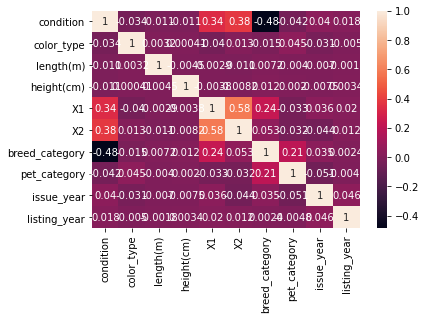

In [8]:
#correlation matrix
corrmatrix = train.corr()
sns.heatmap(corrmatrix, annot=True)
plt.show()

In [134]:

 ["amount"].fillna(df["amount"].mean(), inplace=True)

NameError: name 'df' is not defined

In [9]:
#data preprocessing 
X = train.drop(["pet_id","issue_date","listing_date","breed_category","pet_category"],axis=1) 
y = train[["breed_category","pet_category"]]

In [10]:
test_X = test.drop(["pet_id","issue_date","listing_date"],axis=1)

In [11]:
X_train, X_vald, y_train, y_vald = sklearn.model_selection.train_test_split(X, y, 
                                                    test_size = 0.2, random_state=0)

In [22]:
y1_train = y_train[["breed_category"]]
y2_train = y_train[["pet_category"]]
y1_vald = y_vald[["breed_category"]]
y2_vald = y_vald[["pet_category"]]


In [13]:
train.dtypes

pet_id                    object
issue_date        datetime64[ns]
listing_date      datetime64[ns]
condition                float64
color_type                 int32
length(m)                float64
height(cm)               float64
X1                         int64
X2                         int64
breed_category           float64
pet_category               int64
issue_year                 int64
listing_year               int64
dtype: object

In [133]:
#model 1
model1 = RandomForestClassifier(n_estimators = 100, random_state = 0)  
model1.fit(X_train,y1_train)
y1_pred1 = regressor.predict(X_vald)
acc1 =metrics.accuracy_score(y1_vald, y1_pred1)
print(acc1)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [68]:
#model2-XGboost
classifier2 = ltb.LGBMClassifier(objective ="multi:softmax")
classifier2.fit(X_train, y1_train)

y1_pred2 = classifier2.predict(X_vald)

result12 = accuracy_score(y1_vald,y1_pred2)
print("Accuracy:",result12)
y1_pred= classifier2.predict(test_X)
classifier2.fit(X_train, y2_train)

y2_pred2 = classifier2.predict(X_vald)

result22 = accuracy_score(y2_vald,y2_pred2)
print("Accuracy:",result22)
y2_pred= classifier2.predict(test_X)
s1 =f1_score(y1_vald, y1_pred2, average='weighted')
s2 =f1_score(y2_vald, y2_pred2, average='weighted')
print("F1 score:",s1)
print("F1 score:",s2)


C:\Users\user\anaconda3\envs\MLComp\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Accuracy: 0.9001858242633395
Accuracy: 0.877621449429254
F1 score: 0.9001047801684486
F1 score: 0.8755416682630859


In [86]:
#submission


submission = pd.DataFrame({"pet_id":test["pet_id"],"breed_category":y1_pred,"pet_category":y2_pred})
submission.to_csv("submission2.csv",index=False)

In [23]:
#model 3 xgboost
from xgboost import XGBRegressor
classifier3 = XGBRegressor()
# Cross validation scores
f1_scores = cross_val_score(classifier3,X_train, y1_train, cv=5, scoring='f1')
print("F1-score = ",f1_scores," Mean F1 score = ",np.mean(f1_scores))


[14:18:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ValueError: Classification metrics can't handle a mix of multiclass and continuous targets